## Problem Defination

* Problem
    * Developing a Model That Predicts Melbourne House Prices Using Machine Learning

* Dataset
    * Melbourne is the capital and largest city of the Australian state of Victoria, and the second-most populous city in both Australia and Oceania. The dataset contains several attributes of the houses in Melbourne along with their prices.
    * https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data

## Import Required Libraries

* Numpy, Pandas, Seaborn, Matplotlib and Sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Gathering and Observing Data

* Find shape, size and column count
* Show some information like number of col, col label, col data type, memory usage, number of cell in each col

In [2]:
house_data = pd.read_csv("Melbourne_housing_FULL.csv")
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
print(f"Data size: {house_data.size}\nData shape: {house_data.shape}\nData column count: {len(house_data.columns)}")


Data size: 731997
Data shape: (34857, 21)
Data column count: 21


In [4]:
house_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
house_data.memory_usage()

Index               128
Suburb           278856
Address          278856
Rooms            278856
Type             278856
Price            278856
Method           278856
SellerG          278856
Date             278856
Distance         278856
Postcode         278856
Bedroom2         278856
Bathroom         278856
Car              278856
Landsize         278856
BuildingArea     278856
YearBuilt        278856
CouncilArea      278856
Lattitude        278856
Longtitude       278856
Regionname       278856
Propertycount    278856
dtype: int64

In [6]:
house_data.shape[0] # Number of cell in each column

34857

In [7]:
str_column = []
num_column = []

for column in house_data.columns:
    if house_data[column].dtype == "float64" or house_data[column].dtype == "int64":
        num_column.append(column)
    else:
        str_column.append(column)

## Explonaroty Data Analysis 

* Examine the descriptive statistics of dataset
* Check for duplicate data and clear them.
* Clear outlier data in the dataset. When you examine the dataset, you will observe that the outiller data is generally in the "Landsize" and "Buildingarea" variables. We expect you to use the z-score method when detecting outlers in the dataset!
* Find and remove the missing values on the dataset (with using mode())
* Data visualization
    * Build a histogram to visualize price distribution
    * Draw a pair plot to see the relationship between all numerical variables and the price variable
    * Draw a correlation matrix by using heatmap on seaborn
    * Implement Label Encoder and One Hot encoder for categorical variables 

In [8]:
house_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [9]:
duplicate_counter = 0
for row in house_data.duplicated():
    if row == True:
        duplicate_counter +=1
duplicate_counter # show duplicated line count

house_data.drop_duplicates(inplace=True) # We have not any duplicated line but this command drop the duplicate lines when dataset have duplicate lines

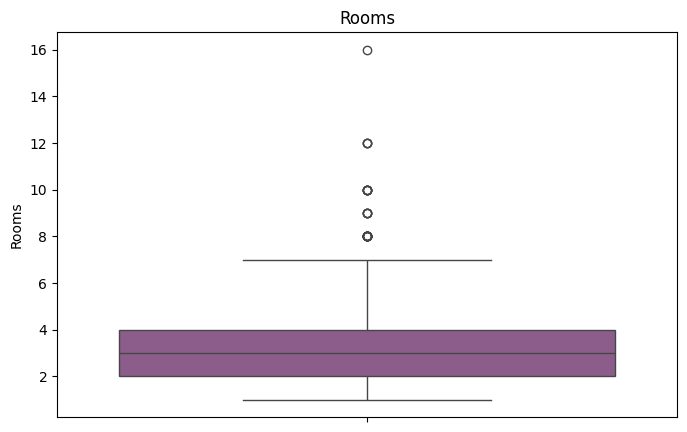

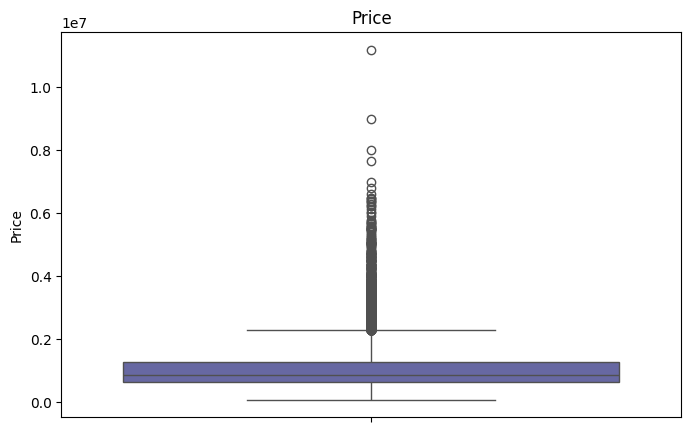

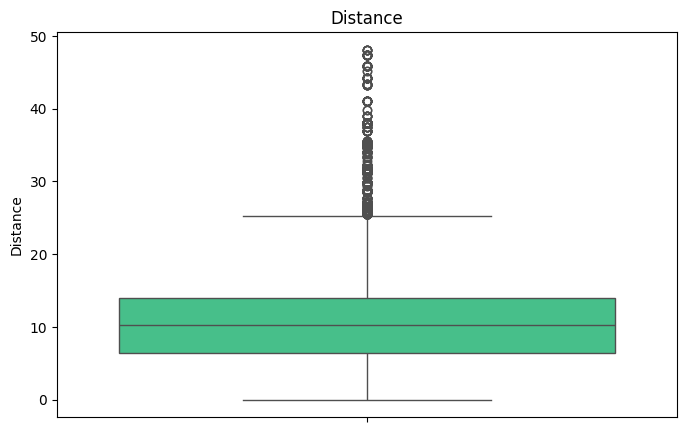

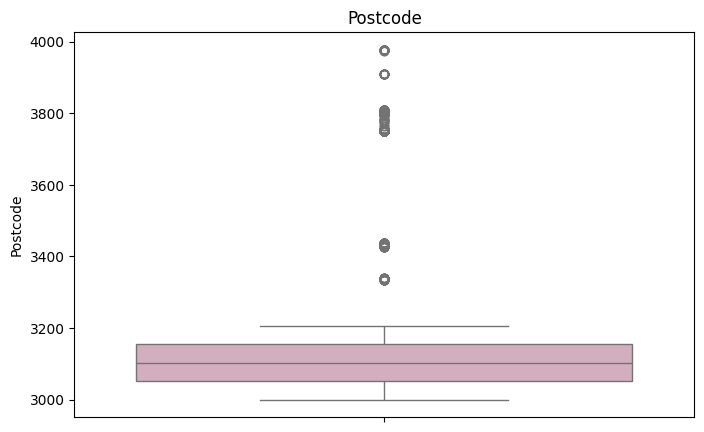

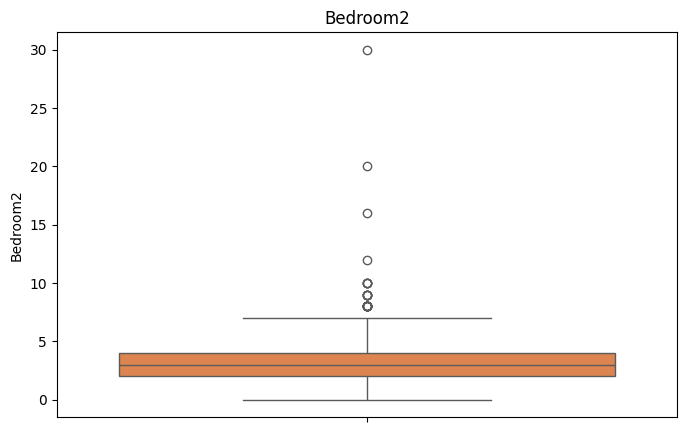

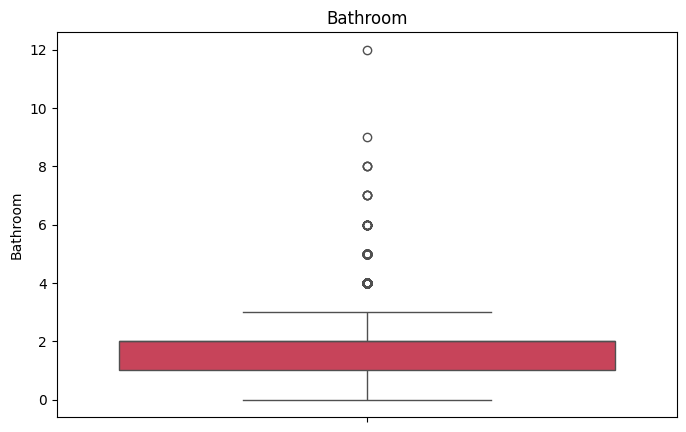

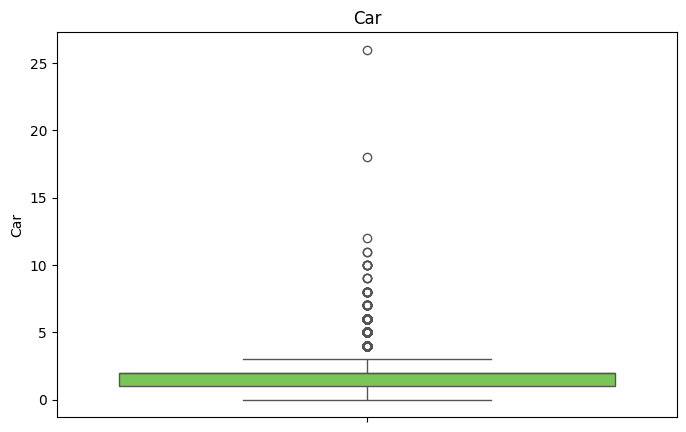

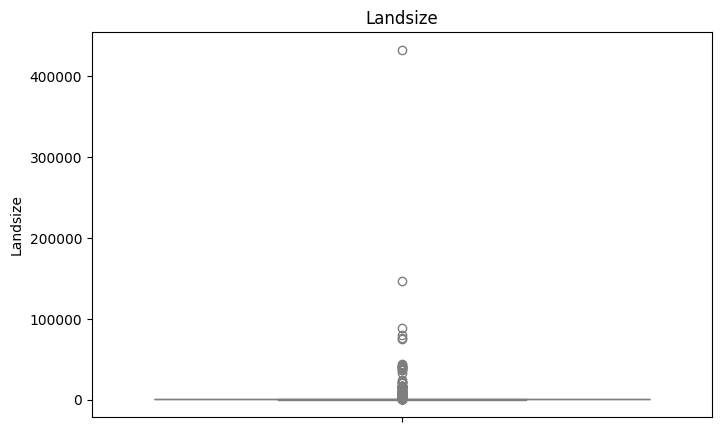

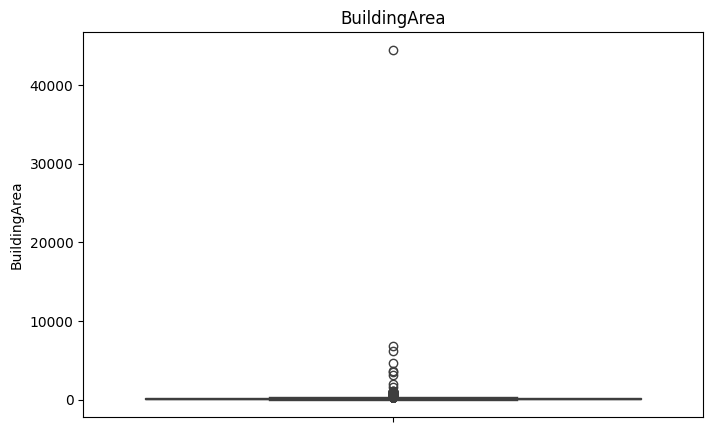

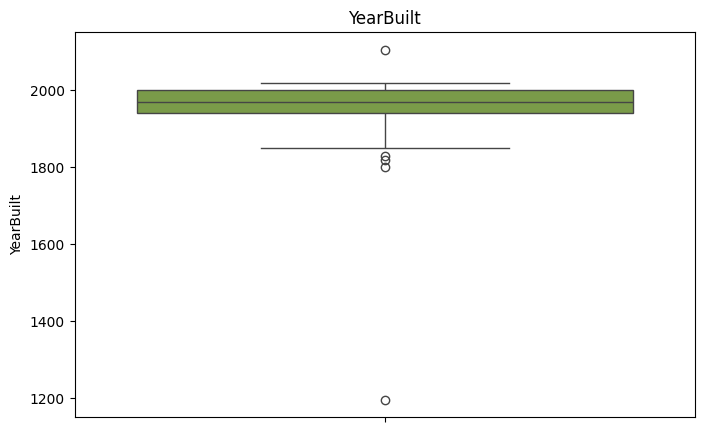

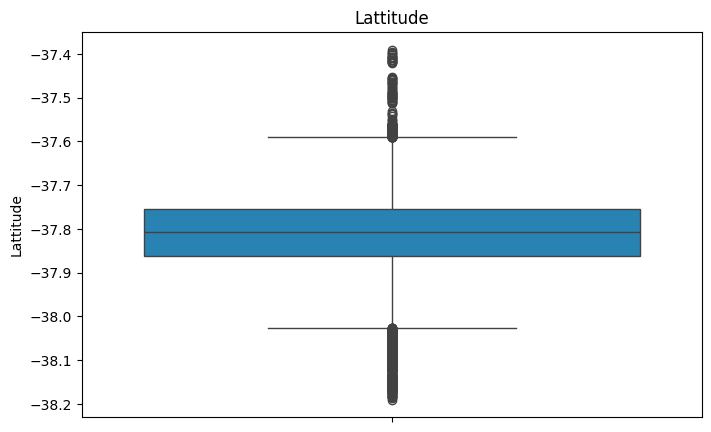

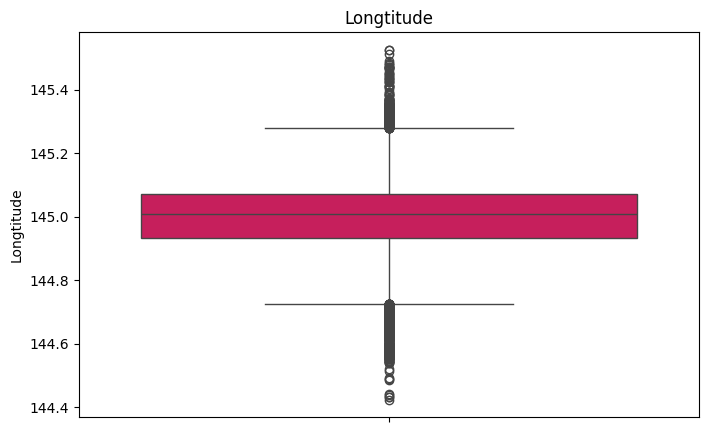

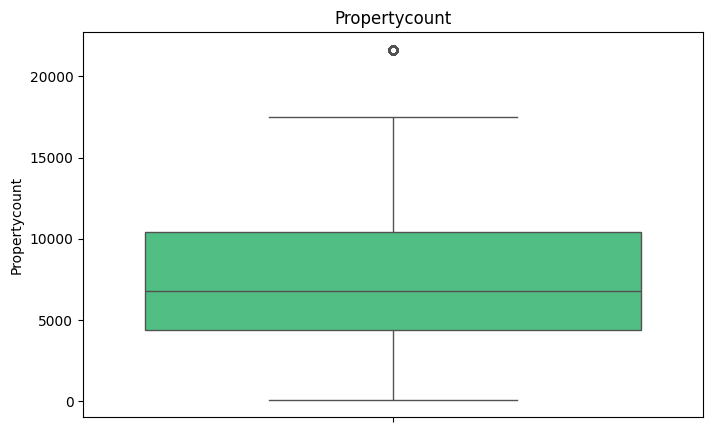

In [10]:
for column in num_column:
    plt.figure(figsize=(8, 5))
    sns.boxplot(house_data[column],color=np.random.rand(3,))
    plt.title(column)

In [11]:
for column in num_column:
    house_data = house_data[np.abs(stats.zscore(house_data[column],nan_policy="omit"))<2]
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,West Footscray,510 Barkly St,4,h,832000.0,S,Jas,24/02/2018,6.4,3012.0,...,1.0,1.0,219.0,113.0,1910.0,Maribyrnong City Council,-37.79761,144.88053,Western Metropolitan,5058.0
34828,West Footscray,30 Gwelo St,3,h,900000.0,PI,Village,24/02/2018,6.4,3012.0,...,1.0,2.0,460.0,112.0,1940.0,Maribyrnong City Council,-37.80139,144.86458,Western Metropolitan,5058.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


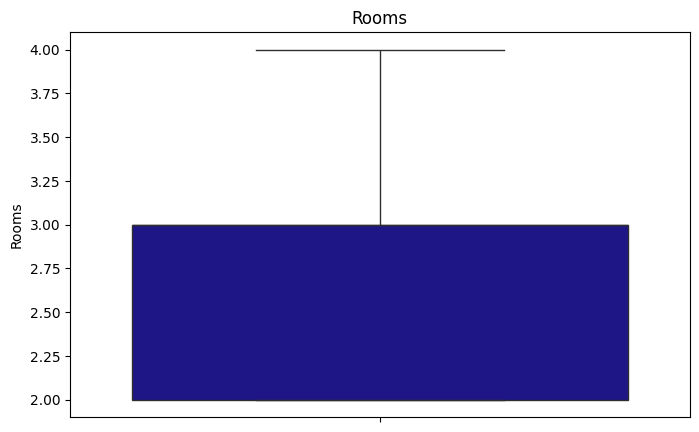

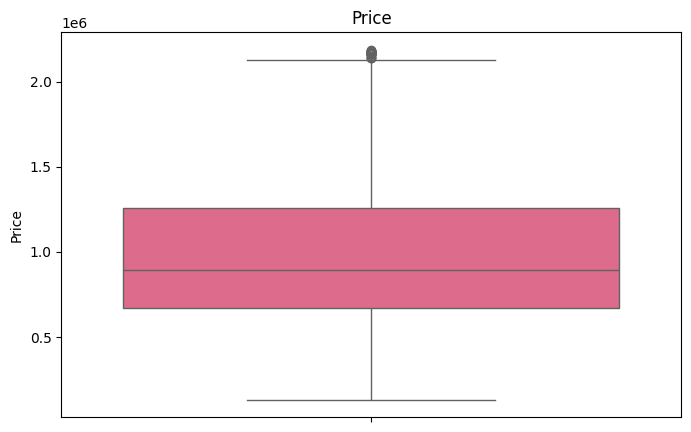

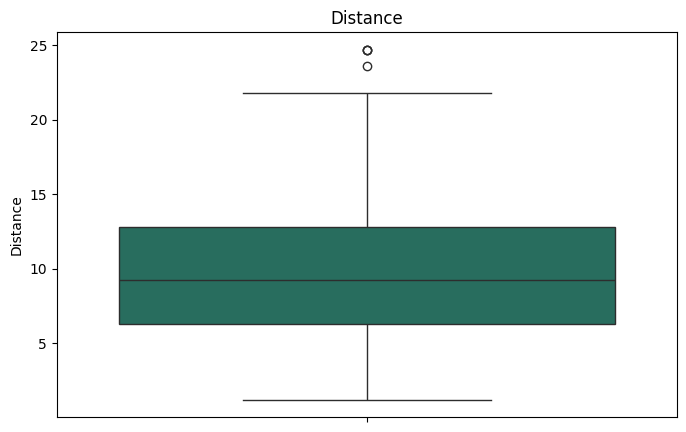

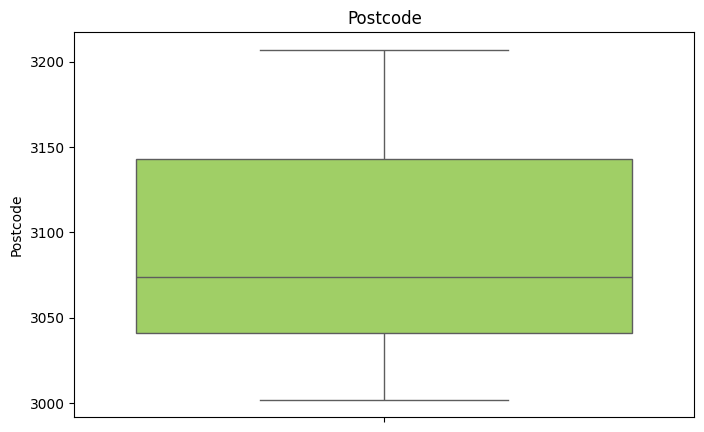

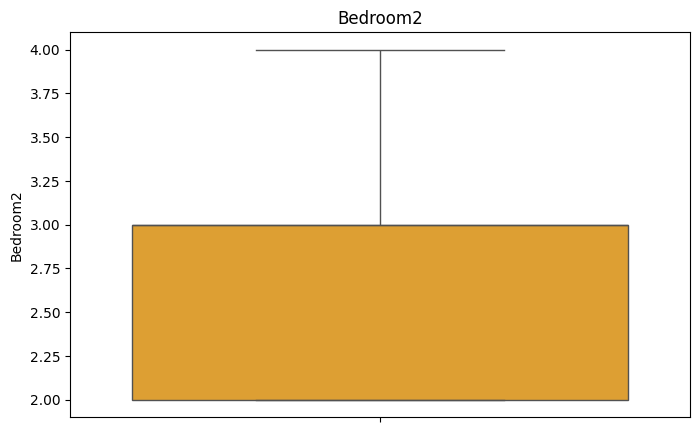

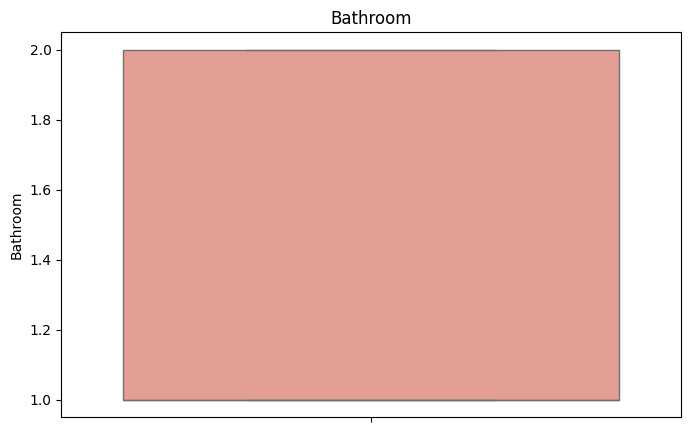

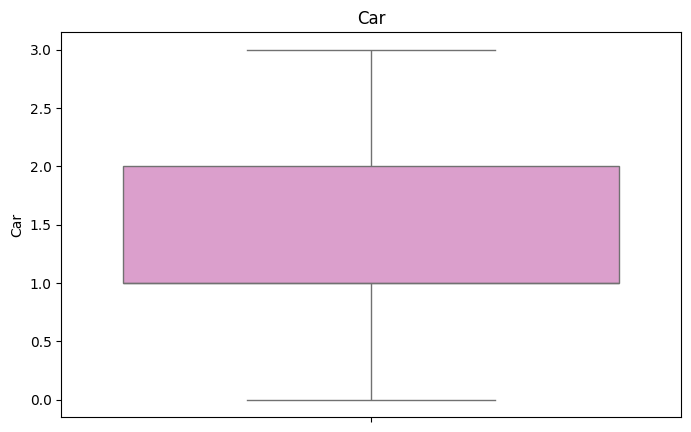

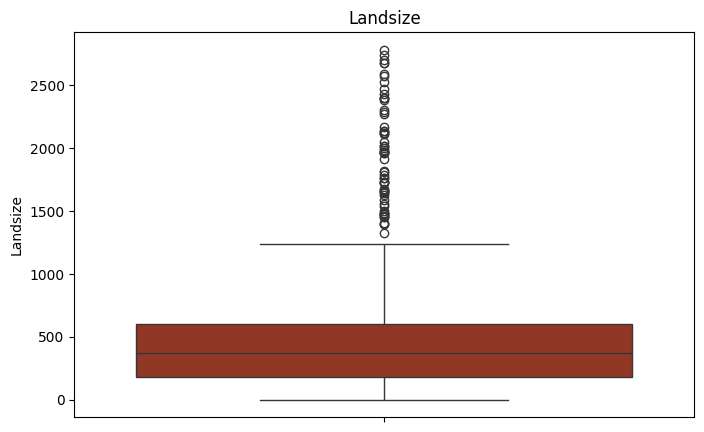

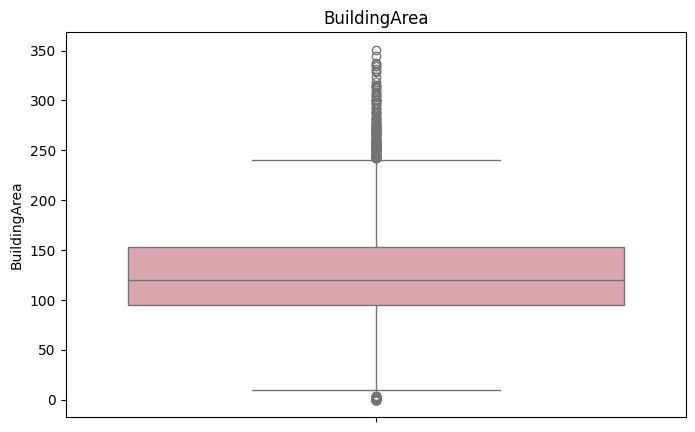

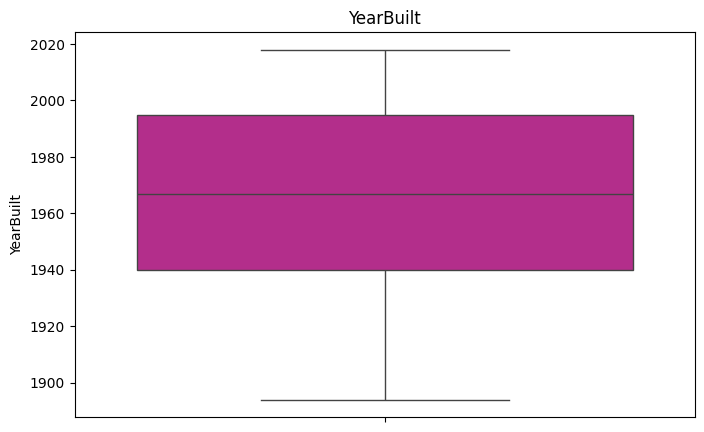

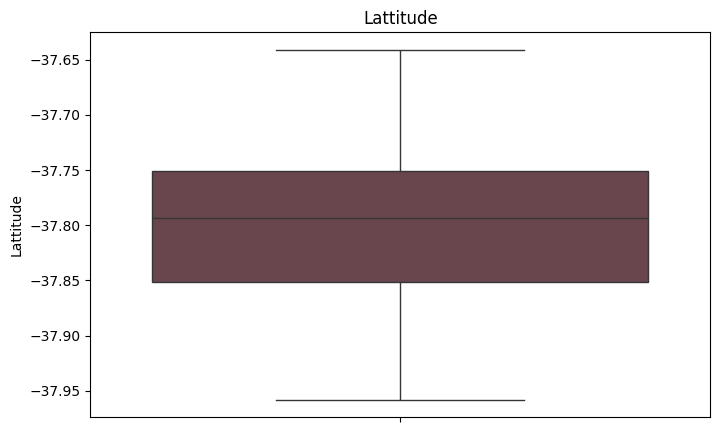

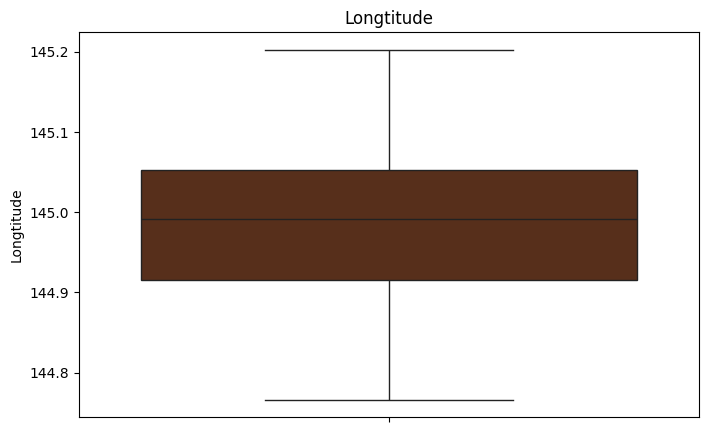

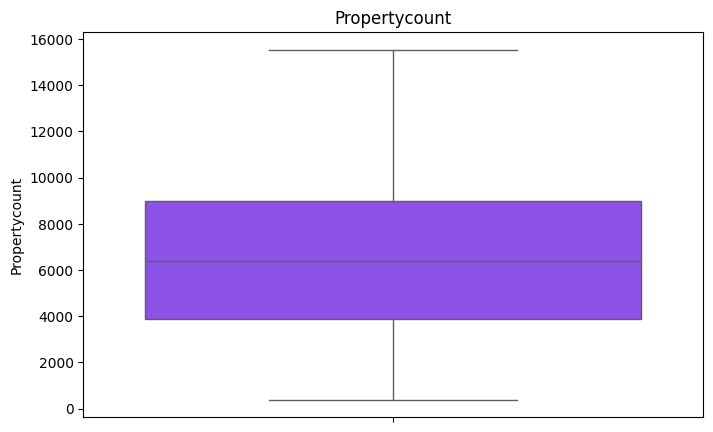

In [12]:
for column in num_column:
    plt.figure(figsize=(8, 5))
    sns.boxplot(house_data[column],color=np.random.rand(3,))
    plt.title(column)

In [13]:
for column in house_data.columns:
    house_data[column] = house_data[column].fillna(house_data[column].mode().iloc[0])
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,West Footscray,510 Barkly St,4,h,832000.0,S,Jas,24/02/2018,6.4,3012.0,...,1.0,1.0,219.0,113.0,1910.0,Maribyrnong City Council,-37.79761,144.88053,Western Metropolitan,5058.0
34828,West Footscray,30 Gwelo St,3,h,900000.0,PI,Village,24/02/2018,6.4,3012.0,...,1.0,2.0,460.0,112.0,1940.0,Maribyrnong City Council,-37.80139,144.86458,Western Metropolitan,5058.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


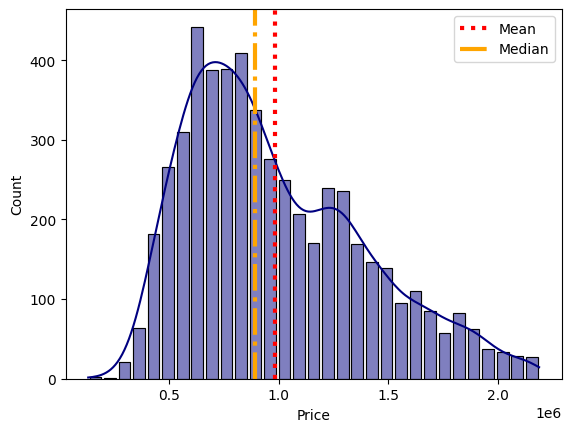

In [14]:
sns.histplot(house_data["Price"],kde=True,shrink=.8,color = "navy")
plt.axvline(house_data["Price"].mean(), 0 ,1,color="red",linewidth = 3,linestyle=":",label="Mean")
plt.axvline(house_data["Price"].median(), 0 ,1,color="orange",linewidth = 3,linestyle="-.",label="Median")
plt.legend()


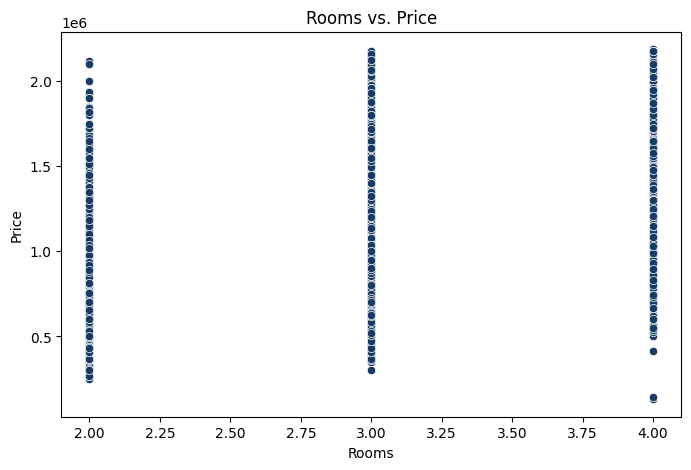

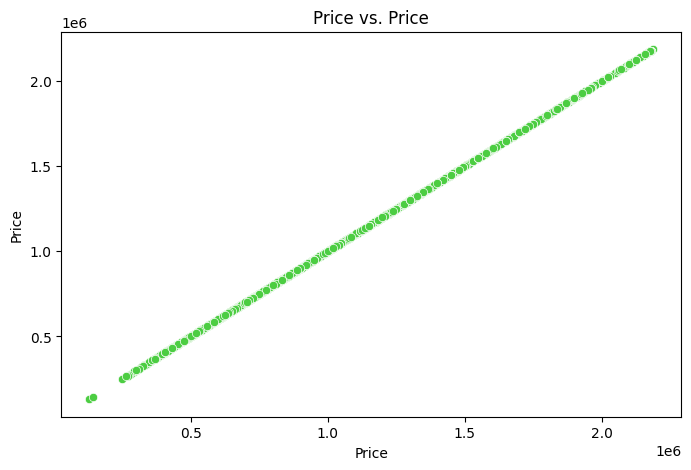

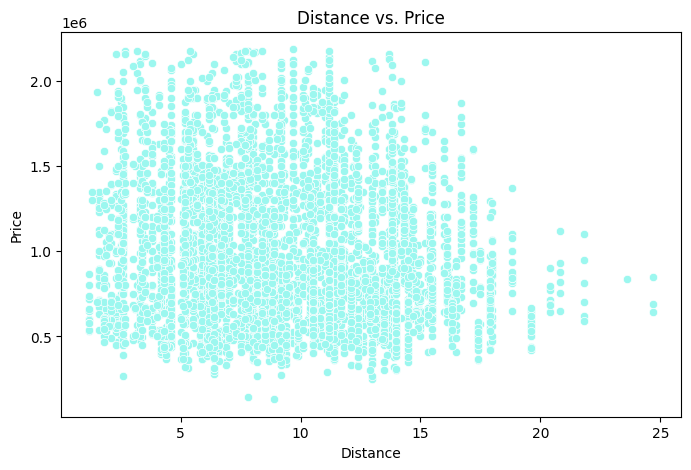

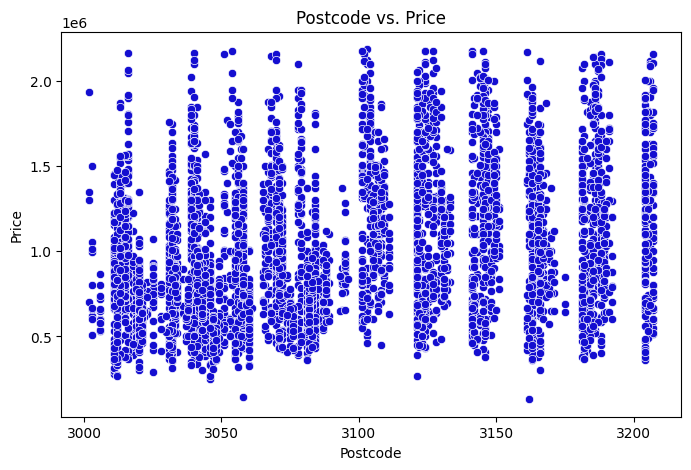

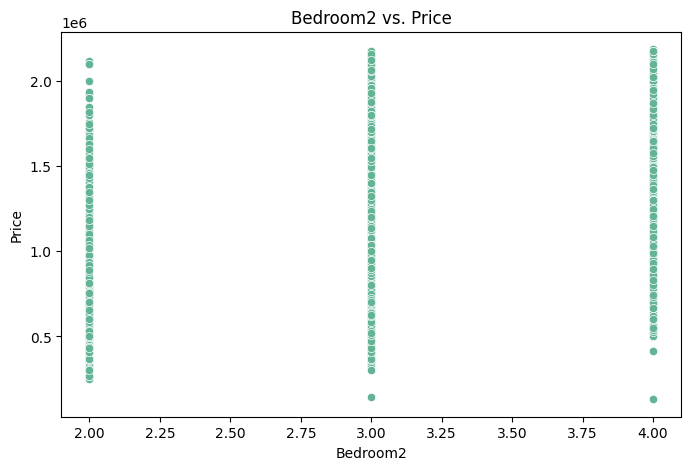

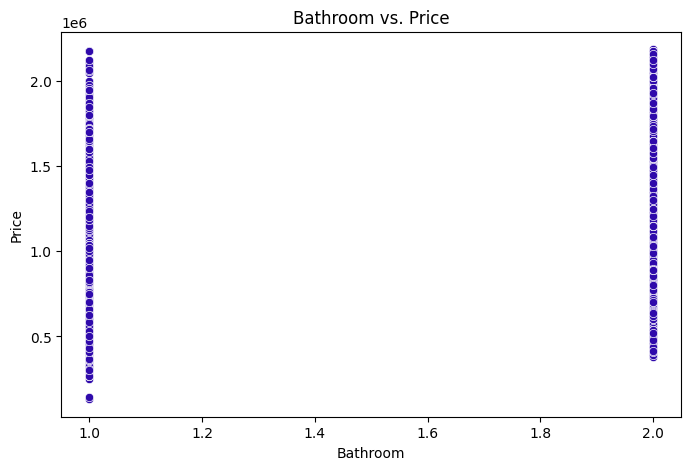

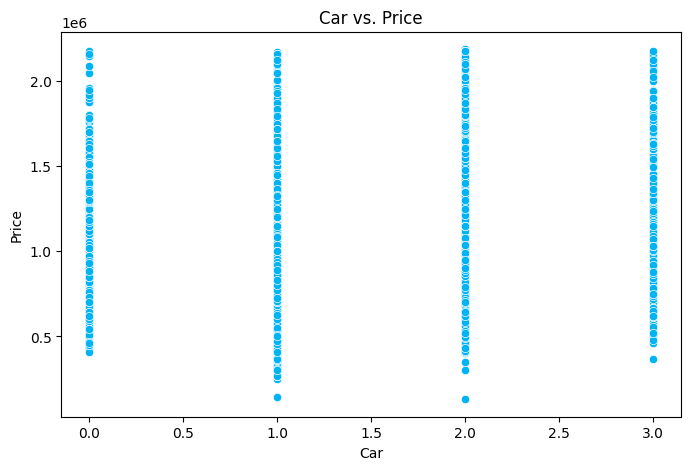

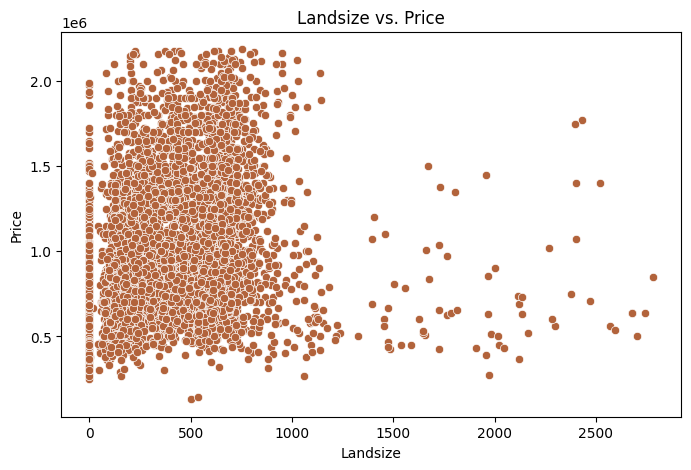

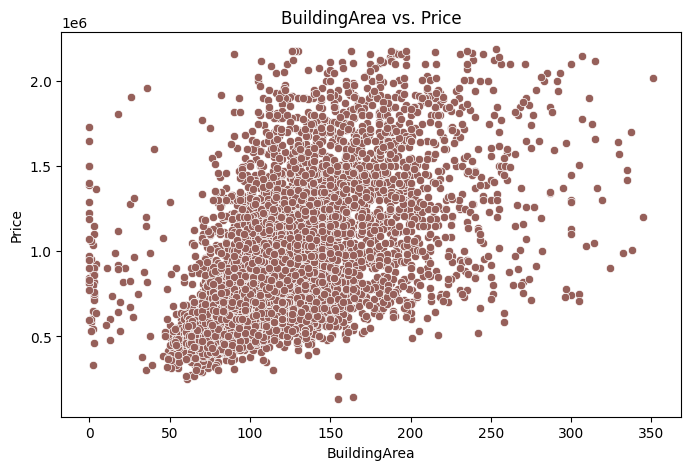

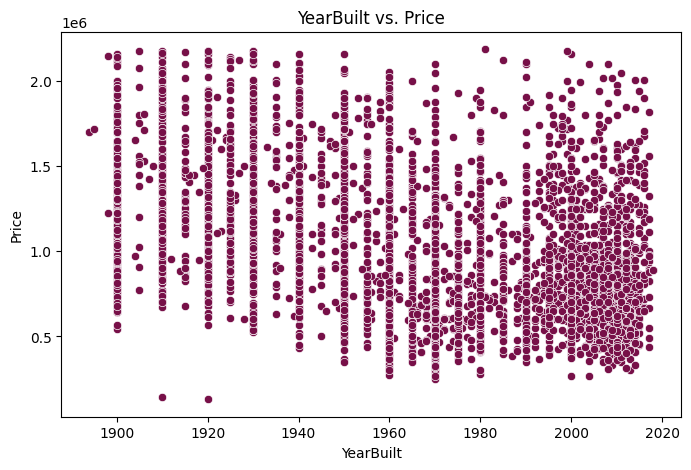

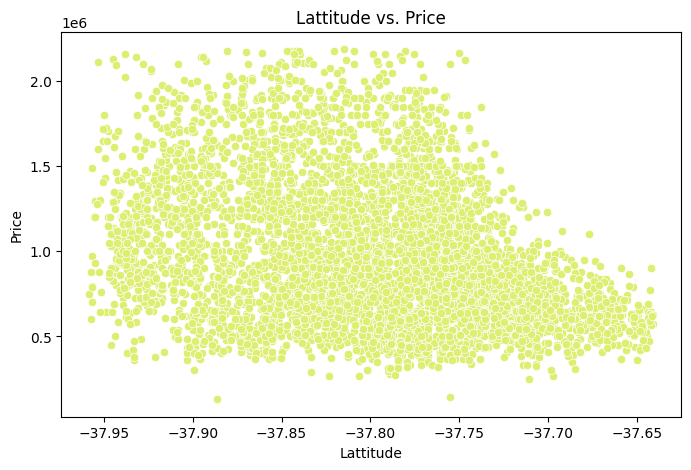

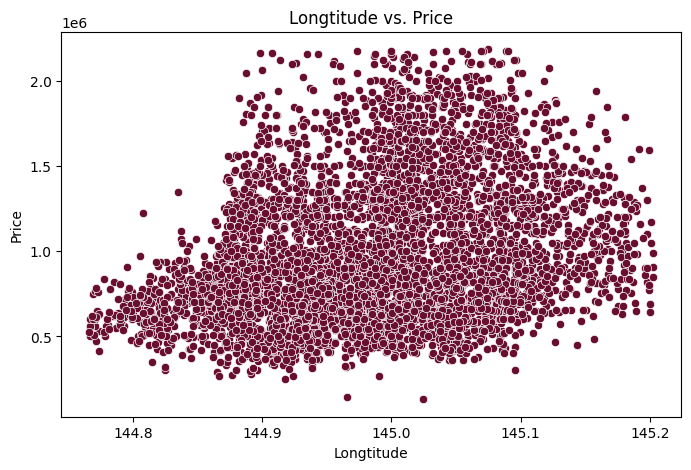

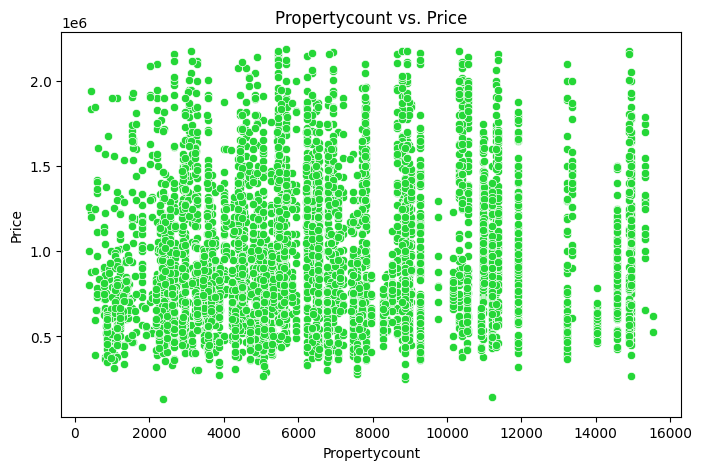

In [15]:
for column in num_column:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=column, y="Price", data=house_data, color=np.random.rand(3,))
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.title(f"{column} vs. Price")

Text(0.5, 1.0, 'Correlation Matrix For Numerical Columns')

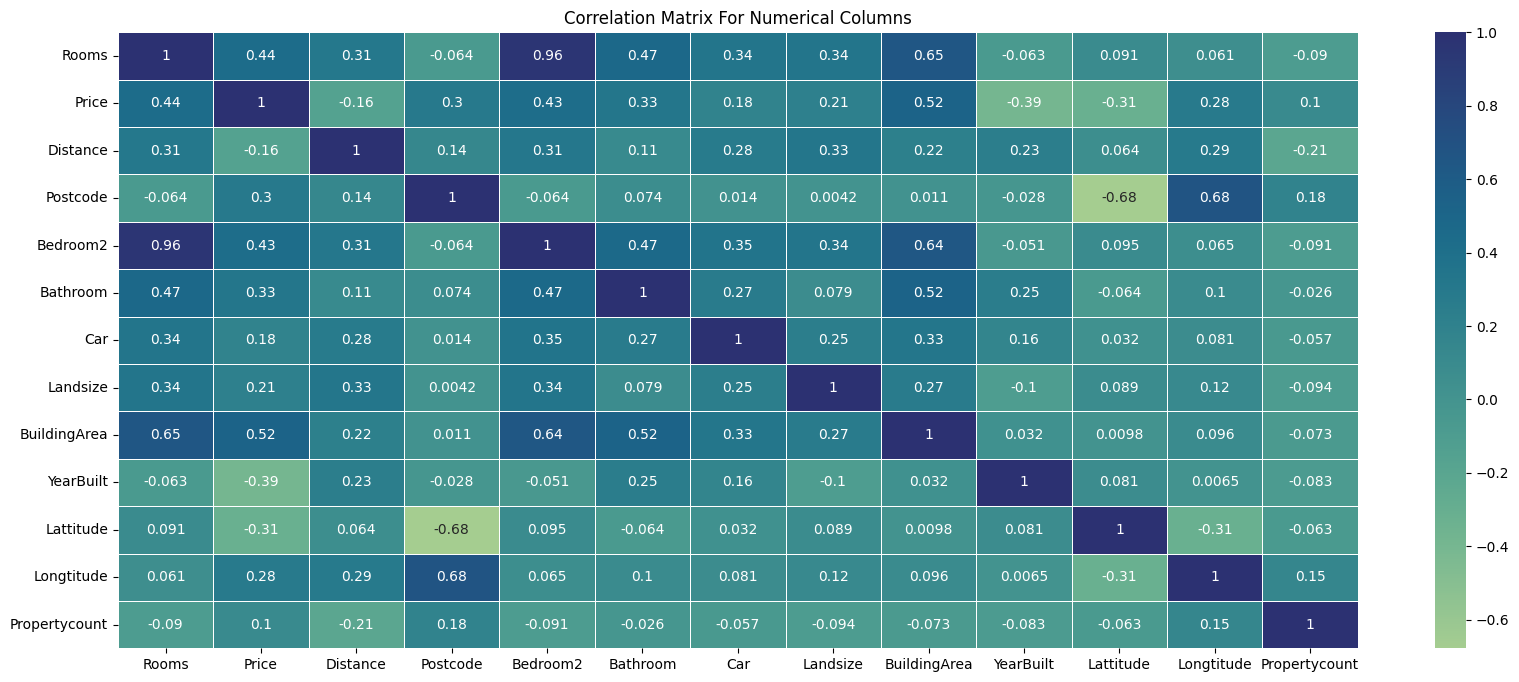

In [16]:
corr_matrix = house_data[num_column].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, cmap="crest", annot=True,linewidth=.5);
plt.title("Correlation Matrix For Numerical Columns")


In [17]:
encoded_house_data = pd.get_dummies(house_data, columns=str_column, drop_first=True) # Hot Encode

In [18]:
print(encoded_house_data)

       Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
2          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
4          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
6          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
11         3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
18         2  1097000.0       2.5    3067.0       3.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
34826      4   832000.0       6.4    3012.0       4.0       1.0  1.0   
34828      3   900000.0       6.4    3012.0       3.0       1.0  2.0   
34853      2   888000.0       6.3    3013.0       2.0       2.0  1.0   
34854      2   705000.0       6.3    3013.0       2.0       1.0  2.0   
34856      2  1020000.0       6.3    3013.0       2.0       1.0  0.0   

       Landsize  BuildingArea  YearBuilt  ...  \
2         156.0          79.0     1900.0  ...   
4         134.0         150.0     190

## Model


* Price estimation
* Models: Lasso, LinearRegression, Ridge, ElasticNet, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
* Find best model with MAE, MSE, RMSE and R2 metrics

In [19]:
models = {
    "Lasso": {
        "model": Lasso()
    },
    "LinearRegression": {
        "model": LinearRegression()
    },
    "Ridge": {
        "model": Ridge()
    },
    "ElasticNet": {
        "model": ElasticNet()
    },
    "KNeighborsRegressor": {
        "model": KNeighborsRegressor()
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor()
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor()
    },
    "AdaBoostRegressor": {
        "model": AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss="exponential", random_state=2)
    }
}

In [20]:
x = encoded_house_data.drop("Price", axis=1)
y = encoded_house_data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [21]:
def model_train():    
    for name, params in models.items():
        model = params["model"]
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        print(f"""-----------{name}--------------
    MAE: {mae}
    MSE: {mse}
    RMSE: {rmse}
    R2 Score: {r2}
    ------------------------------""")

model_train()

c:\Users\Gökdeniz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+12, tolerance: 6.842e+10
  model = cd_fast.enet_coordinate_descent(


-----------Lasso--------------
    MAE: 151432.2957388194
    MSE: 40732213451.472534
    RMSE: 201822.23230227272
    R2 Score: 0.7670218037218441
    ------------------------------
-----------LinearRegression--------------
    MAE: 165056.525146648
    MSE: 46197052153.28721
    RMSE: 214934.9951806062
    R2 Score: 0.7357642766734629
    ------------------------------


c:\Users\Gökdeniz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


-----------Ridge--------------
    MAE: 147691.3509635733
    MSE: 37869530861.66279
    RMSE: 194600.95287963722
    R2 Score: 0.78339564078536
    ------------------------------
-----------ElasticNet--------------
    MAE: 183852.15905441568
    MSE: 58773553709.08623
    RMSE: 242432.575593888
    R2 Score: 0.6638297953457964
    ------------------------------
-----------KNeighborsRegressor--------------
    MAE: 177552.54643874642
    MSE: 61218544632.44038
    RMSE: 247423.81581497035
    R2 Score: 0.6498450514055203
    ------------------------------
-----------RandomForestRegressor--------------
    MAE: 125391.99260208927
    MSE: 29614684485.223312
    RMSE: 172089.17596764566
    R2 Score: 0.8306113223398965
    ------------------------------
-----------GradientBoostingRegressor--------------
    MAE: 128874.72844508056
    MSE: 30829344039.837334
    RMSE: 175582.86943730398
    R2 Score: 0.8236637698219575
    ------------------------------
-----------AdaBoostRegressor-----